In [1]:
# Libraries
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(ggplot2)
library("rjson")

── Attaching core tidyverse packages ─────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: viridisLite



In [2]:
#ERROR: dependencies ‘broom’, ‘dbplyr’, ‘modelr’, ‘rvest’, ‘stringr’, ‘tidyr’ are not available for package ‘tidyverse’

# install.packages("broom")
# install.packages("dbplyr")
# install.packages("modelr")
# install.packages("rvest")
# install.packages("stringr")
# install.packages("tidyr")

# install.packages("tidyverse")
# BiocManager::install("tidyverse")

In [3]:
# install.packages("hrbrthemes")
# install.packages("viridis")
# install.packages("ggplot2")
# install.packages("rjson")


In [5]:
dataset = "atac"
metadata = read.table("/mnt/lab_data2/anusri/chrombpnet/logs/checkpoint/JAN_02_2023/model_dir_atac.csv", sep=",", header=FALSE)
colnames(metadata) = c("fold", "cell_type", "model_dir")

In [6]:
head(metadata)

,fold,cell_type,model_dir
,<chr>,<chr>,<chr>
1,fold_0,GM12878,/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0
2,fold_1,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/GM12878/GM12878_07.08.2022_bias_128_4_1234_0.4_fold_1_data_type_ATAC_PE
3,fold_2,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/GM12878/GM12878_07.08.2022_bias_128_4_1234_0.4_fold_2_data_type_ATAC_PE
4,fold_3,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/GM12878/GM12878_07.14.2022_bias_128_4_1234_0.4_fold_3_data_type_ATAC_PE
5,fold_4,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/GM12878/GM12878_07.07.2022_bias_128_4_1234_0.4_fold_4_data_type_ATAC_PE
6,fold_0,K562,/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/nautilus_runs/K562_02.17.2022_bias_128_4_1234_0.5_fold_0


In [31]:
counts_peaks = list()
counts_peaks_nonpeaks = list()
profile_peaks = list()
profile_peaks_nonpeaks = list(
)
for (i in 1:nrow(metadata)){
        inputf = file.path(metadata[i,"model_dir"], "chrombpnet_model/chrombpnet_metrics.json")
        result <- fromJSON(file = inputf)
        counts_peaks = append(counts_peaks, result$counts_metrics$peaks$pearsonr)
        counts_peaks_nonpeaks = append(counts_peaks_nonpeaks, result$counts_metrics$peaks_and_nonpeaks$pearsonr)
        profile_peaks = append(profile_peaks, result$profile_metrics$peaks$median_jsd*sqrt(log2(exp(1)))
)
        profile_peaks_nonpeaks = append(profile_peaks_nonpeaks, result$profile_metrics$peaks_and_nonpeaks$median_jsd*sqrt(log2(exp(1)))
)
    
}

In [14]:
metadata$counts_pearsonr_in_peaks = as.numeric(counts_peaks)
metadata$counts_pearsonr_in_peaks_nonpeaks = as.numeric(counts_peaks_nonpeaks)
metadata$profile_jsd_in_peaks = as.numeric(profile_peaks)
metadata$profile_jsd_in_peaks_nonpeaks = as.numeric(profile_peaks_nonpeaks)

metadata$cell_type <- factor(metadata$cell_type , levels=c("HEPG2", "GM12878", "K562", "H1ESC", "IMR90"))


In [20]:
head(metadata)

,fold,cell_type,model_dir,counts_pearsonr_in_peaks,counts_pearsonr_in_peaks_nonpeaks,profile_jsd_in_peaks,profile_jsd_in_peaks_nonpeaks
,<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,fold_0,GM12878,/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0,0.6330793,0.7397478,0.3876646,0.5725672
2,fold_1,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/GM12878/GM12878_07.08.2022_bias_128_4_1234_0.4_fold_1_data_type_ATAC_PE,0.6203872,0.7220585,0.3857861,0.5709025
3,fold_2,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/GM12878/GM12878_07.08.2022_bias_128_4_1234_0.4_fold_2_data_type_ATAC_PE,0.6564146,0.6928328,0.3878328,0.5633976
4,fold_3,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/GM12878/GM12878_07.14.2022_bias_128_4_1234_0.4_fold_3_data_type_ATAC_PE,0.6095498,0.7333907,0.3857570,0.5727457
5,fold_4,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/GM12878/GM12878_07.07.2022_bias_128_4_1234_0.4_fold_4_data_type_ATAC_PE,0.6474911,0.7183592,0.3770893,0.5678469
6,fold_0,K562,/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/nautilus_runs/K562_02.17.2022_bias_128_4_1234_0.5_fold_0,0.6995219,0.6935474,0.4097434,0.5427334


In [23]:
filtered_data <- subset(metadata, cell_type == "K562")

# Calculate the mean and standard deviation of the 'value' column
mean_value <- mean(filtered_data$counts_pearsonr_in_peaks)
std_value <- sd(filtered_data$counts_pearsonr_in_peaks)

# Output the results

std_value

[1] 0.02187854

In [24]:
mean_value

[1] 0.6955751

Saving 7 x 7 in image


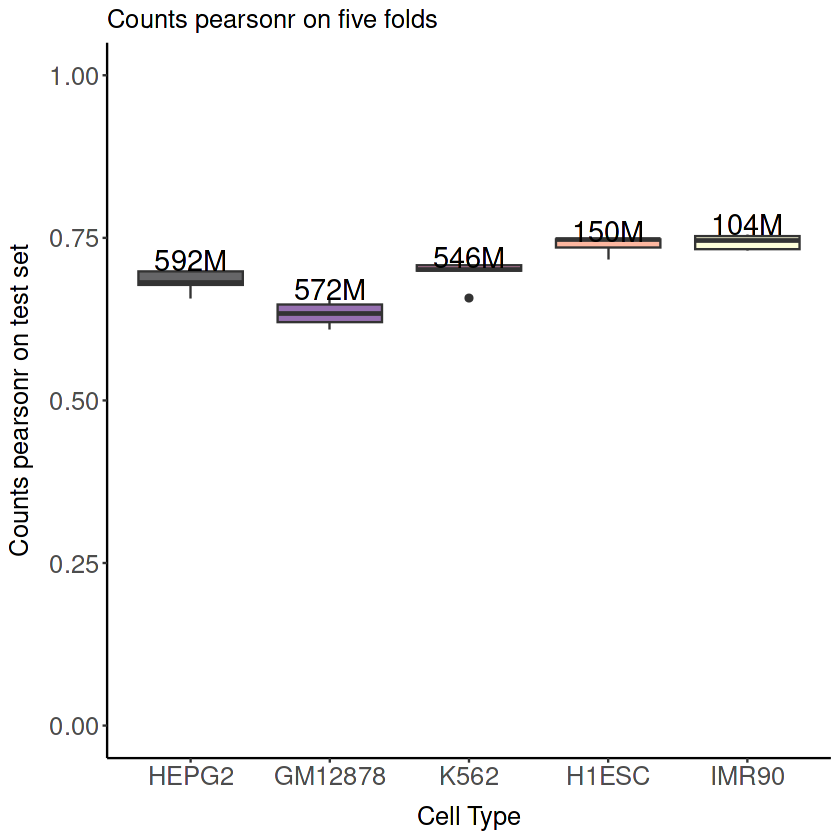

In [25]:
# Boxplot basic

metadata %>%
  ggplot( aes(x=cell_type, y=counts_pearsonr_in_peaks, fill=cell_type)) +
    geom_boxplot() + 
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_classic() +
    annotate("text", x=1.0, y=0.715, label="592M", size=6)+
    annotate("text", x=2, y=0.67, label="572M", size=6)+
    annotate("text", x=3, y=0.72, label="546M", size=6)+
    annotate("text", x=4, y=0.76, label="150M", size=6)+
    annotate("text", x=5, y=0.77, label="104M", size=6)+

    ggtitle("Counts pearsonr on five folds") +
    xlab("Cell Type") + 
    ylab("Counts pearsonr on test set") +
    theme(
     legend.position="none",
     plot.title = element_text(size=15),
     axis.text=element_text(size=15),
     axis.title=element_text(size=15),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=15),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=15),)+
     ylim(0, 1)


ggsave(file.path("figure_1_supp", paste(dataset,"_counts_pearsonr_peaks.pdf", sep="")), dpi=300, device="pdf")

Saving 7 x 7 in image


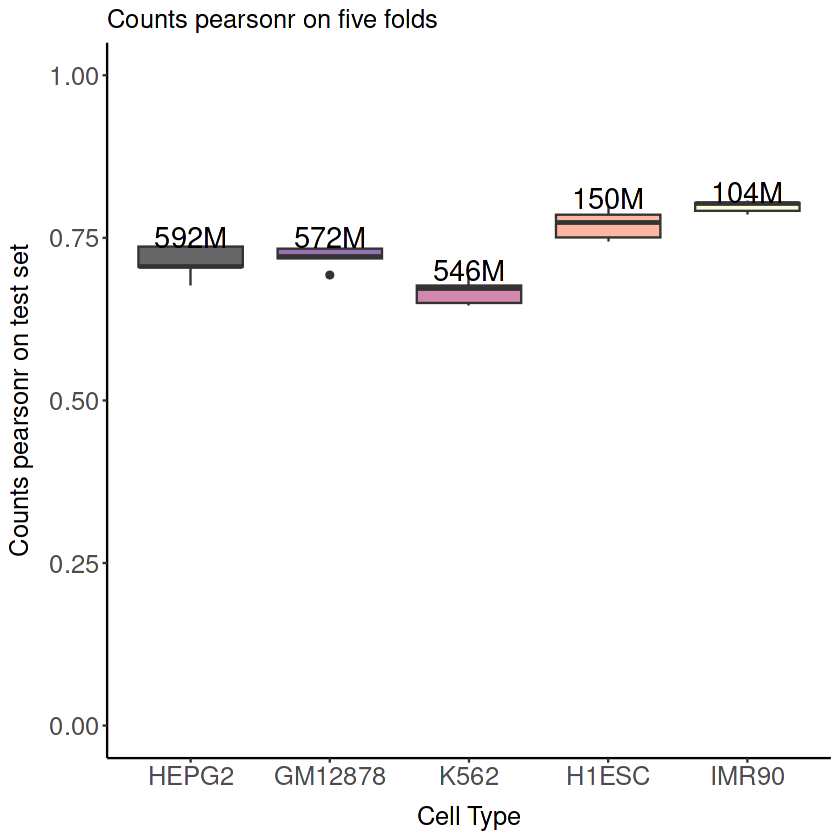

In [26]:
# Boxplot basic

metadata %>%
  ggplot( aes(x=cell_type, y=counts_pearsonr_in_peaks_nonpeaks, fill=cell_type)) +
    geom_boxplot() + 
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_classic() +
    annotate("text", x=1.0, y=0.75, label="592M", size=6)+
    annotate("text", x=2, y=0.75, label="572M", size=6)+
    annotate("text", x=3, y=0.70, label="546M", size=6)+
    annotate("text", x=4, y=0.81, label="150M", size=6)+
    annotate("text", x=5, y=0.82, label="104M", size=6)+

    ggtitle("Counts pearsonr on five folds") +
    xlab("Cell Type") + 
    ylab("Counts pearsonr on test set") +
    theme(
     legend.position="none",
     plot.title = element_text(size=15),
     axis.text=element_text(size=15),
     axis.title=element_text(size=15),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=15),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=15),
        
    ) +
     ylim(0, 1)


ggsave(file.path("figure_1_supp", paste(dataset,"_counts_pearsonr_peaks_nonpeaks.pdf", sep="")), dpi=300, device="pdf")

Saving 7 x 7 in image


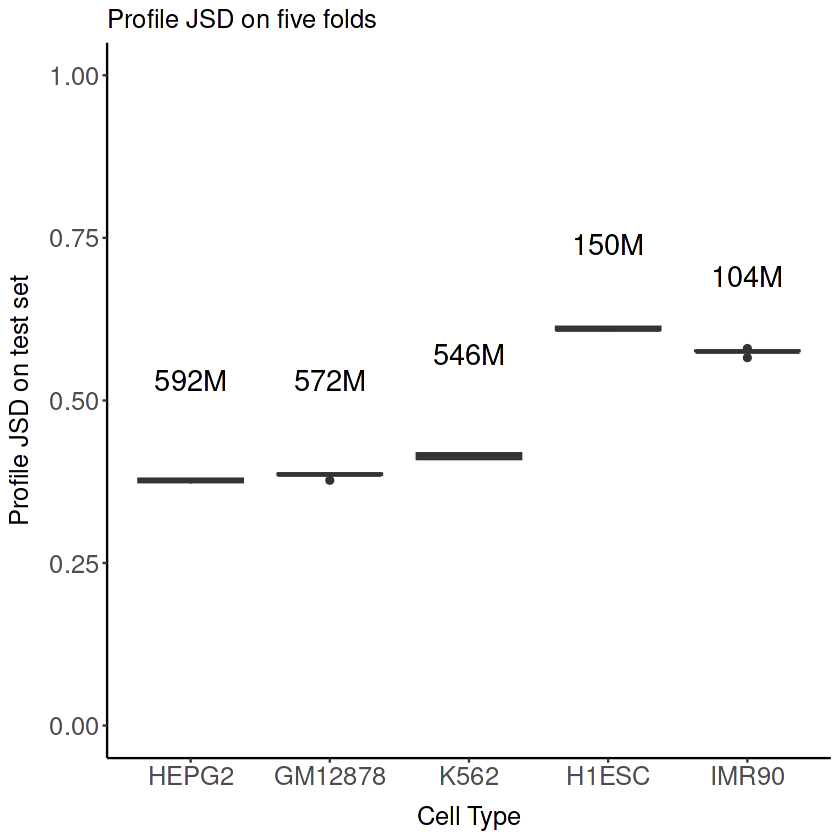

In [27]:

# Boxplot basic

metadata %>%
  ggplot( aes(x=cell_type, y=profile_jsd_in_peaks, fill=cell_type)) +
    geom_boxplot() + 
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_classic() +
    annotate("text", x=1.0, y=0.53, label="592M", size=6)+
    annotate("text", x=2, y=0.53, label="572M", size=6)+
    annotate("text", x=3, y=0.57, label="546M", size=6)+
    annotate("text", x=4, y=0.74, label="150M", size=6)+
    annotate("text", x=5, y=0.69, label="104M", size=6)+

    ggtitle("Profile JSD on five folds") +
    xlab("Cell Type") + 
    ylab("Profile JSD on test set") +
    theme(
     legend.position="none",
     plot.title = element_text(size=15),
     axis.text=element_text(size=15),
     axis.title=element_text(size=15),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=15),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=15),
        
    ) +
    ylim(0, 1)


ggsave(file.path("figure_1_supp", paste(dataset,"_profile_jsd_log2_peaks.pdf", sep="")), dpi=300, device="pdf")

Saving 7 x 7 in image


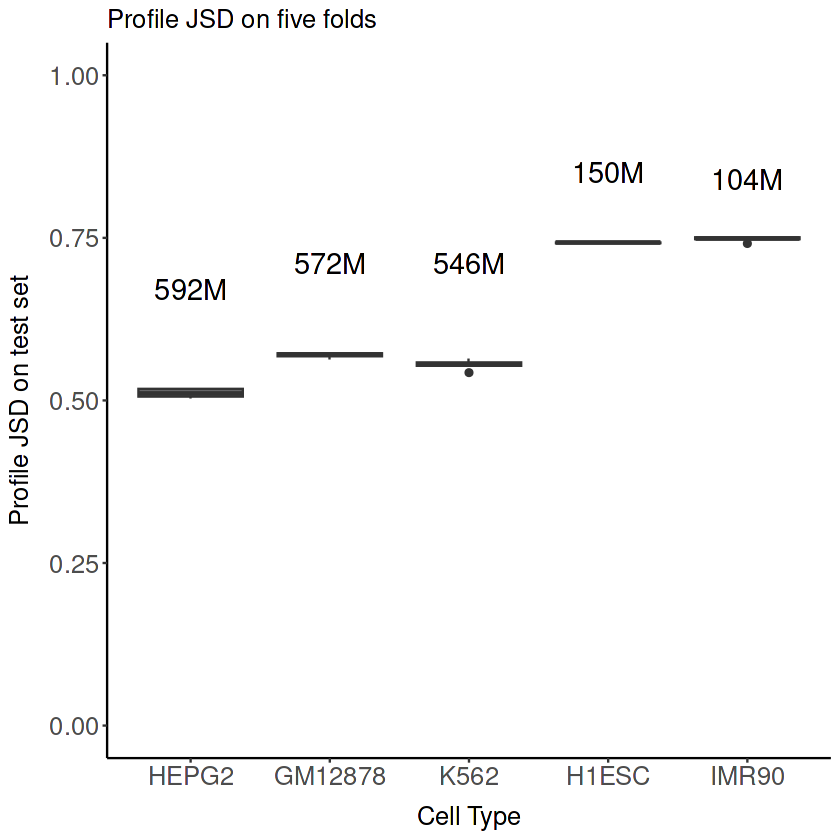

In [28]:

# Boxplot basic

metadata %>%
  ggplot( aes(x=cell_type, y=profile_jsd_in_peaks_nonpeaks, fill=cell_type)) +
    geom_boxplot() + 
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_classic() +
    annotate("text", x=1.0, y=0.67, label="592M", size=6)+
    annotate("text", x=2, y=0.71, label="572M", size=6)+
    annotate("text", x=3, y=0.71, label="546M", size=6)+
    annotate("text", x=4, y=0.85, label="150M", size=6)+
    annotate("text", x=5, y=0.84, label="104M", size=6)+

    ggtitle("Profile JSD on five folds") +
    xlab("Cell Type") + 
    ylab("Profile JSD on test set") +
    theme(
     legend.position="none",
     plot.title = element_text(size=15),
     axis.text=element_text(size=15),
     axis.title=element_text(size=15),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=15),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=15),
        
    ) +
     ylim(0, 1)


ggsave(file.path("figure_1_supp", paste(dataset,"_profile_jsd_log2_peaks_nonpeaks.pdf", sep="")), dpi=300, device="pdf")